<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-LauraIran7/blob/main/Redneuronal_Equipo63.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 7**
###**Red Neuronal Artificial - Perceptrón Multicapa : Multilayer Perceptrón (MLP)**


**Nombres y matrículas de los integrantes del equipo:**

* Laura Irán González Ojeda - A01794099
* Juan Pablo Bladinieres Martin del Campo - A01793474
* Estefania Abigail Castro Belmont - A01332636
* Alejandra Mendoza Flores - A01793032
* Juan Pablo Noguerón Morales - A01097897


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [ ]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import requests, zipfile
from io import BytesIO
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, FunctionTransformer
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_poisson_deviance

#**Ejercicio-1.** 

In [ ]:
#Descarga del archivo Facebook Metrics
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00368/Facebook_metrics.zip'
filename = url.split('/')
req = requests.get(url)
zipfile= zipfile.ZipFile(BytesIO(req.content))


In [ ]:
#Extracción del conjunto de datos
zipfile.extractall('/content/Facebook_metrics')
df = pd.read_csv("/content/Facebook_metrics/dataset_Facebook.csv", sep=";")


#Renombrar la variable Lifetime People who have liked your Page and engaged with your post
df=df.rename(columns= {"Lifetime People who have liked your Page and engaged with your post":"LPE"})
df

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,LPE,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,85093,Photo,3,1,7,2,0.0,4684,7536,733,708,985,4750,2876,392,5,53.0,26.0,84
496,81370,Photo,2,1,5,8,0.0,3480,6229,537,508,687,3961,2104,301,0,53.0,22.0,75
497,81370,Photo,1,1,5,2,0.0,3778,7216,625,572,795,4742,2388,363,4,93.0,18.0,115
498,81370,Photo,3,1,4,11,0.0,4156,7564,626,574,832,4534,2452,370,7,91.0,38.0,136


In [ ]:
#Definición de variables de Entrada y Variable de salida
features = [
  'Category', 
  'Page total likes', 
  'Type', 
  'Post Month', 
  'Post Hour', 
  'Post Weekday',
  'Paid'
]

output = ['LPE']

X = df[features]
y = df[output]

#**Ejercicio-2.**

Realiza una partición de los datos con 100 datos de Prueba y el resto para entrenamiento y validación. 


In [ ]:
Xtv, Xtest, ytv, ytest = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=1)  

print(Xtv.shape, ': dimensión de datos de entrada para entrenamiento y validación')
print(Xtest.shape, ': dimensión de datos de entrada para prueba')  

print(ytv.shape, ': dimensión de variable de salida para entrenamiento y validación')
print(ytest.shape, ': dimensión de variable de salida para prueba')

(400, 7) : dimensión de datos de entrada para entrenamiento y validación
(100, 7) : dimensión de datos de entrada para prueba
(400, 1) : dimensión de variable de salida para entrenamiento y validación
(100, 1) : dimensión de variable de salida para prueba


#**Ejercicio-3.**

In [ ]:
#Definición de la raíz cuadrada del error cuadrático medio RMSE
def mi_RMSE(actual, predictions):
  return np.sqrt(((actual - predictions) ** 2).mean())

#Definición del error absoluto medio MAE
def mi_MAE (actual, predictions):
  actual, predictions = np.array(actual), np.array(predictions)
  return np.mean(np.abs(actual - predictions))

#Definición del error porcentual absoluto medio MAPE
def MAPE(actual, predicted) -> float:
    # Convert actual and predicted
    # to numpy array data type if not already
    if not all([isinstance(actual, np.ndarray),
                isinstance(predicted, np.ndarray)]):
        actual, predicted = np.array(actual), 
        np.array(predicted)
    # Calculate the MAPE value and return
    return round(np.mean(np.abs((
      actual - predicted) / actual)) * 100, 2)
    
def mi_MAPE(actual, predictions):
  return np.abs((( actual - predictions) / actual) * 100).mean()

def _scores_to_accuracy(m, X, y):
    preds = [1.0 if i >= .5 else 0.0 for i in m.predict(X)]
    return (y == preds).sum() * 1.0 / len(y)

def _scores_to_accuracy(m, X, y):
    preds = [1.0 if i >= .5 else 0.0 for i in m.predict(X)]
    # return (y == preds).sum() * 1.0 / len(y)
    return (y.to_numpy().T == preds).sum() * 1.0 / len(y)

#**Ejercicio-4.**

In [ ]:
#Análisis a las variables de entrada
print('Análisis a las variables de entrada\n\n')
print(df[features].dtypes , '\n')
print(df[features].describe() , '\n')

Análisis a las variables de entrada


Category              int64
Page total likes      int64
Type                 object
Post Month            int64
Post Hour             int64
Post Weekday          int64
Paid                float64
dtype: object 

         Category  Page total likes  Post Month   Post Hour  Post Weekday  \
count  500.000000        500.000000  500.000000  500.000000    500.000000   
mean     1.880000     123194.176000    7.038000    7.840000      4.150000   
std      0.852675      16272.813214    3.307936    4.368589      2.030701   
min      1.000000      81370.000000    1.000000    1.000000      1.000000   
25%      1.000000     112676.000000    4.000000    3.000000      2.000000   
50%      2.000000     129600.000000    7.000000    9.000000      4.000000   
75%      3.000000     136393.000000   10.000000   11.000000      6.000000   
max      3.000000     139441.000000   12.000000   23.000000      7.000000   

             Paid  
count  499.000000  
mean     0.27855

Con el análisis anterior, podemos observar que tenemos dos tipos de variables: Numéricas y Cualitativas, por lo que se realizarán dos transformaciones, una para cada tipo de variable.

In [ ]:
#Categorización de las variables: Numéricas y cualitativas
numeric_features = ['Category','Page total likes','Post Month','Post Hour','Post Weekday','Paid']
qualitative_features = ['Type']

**Análisis para variables numéricas**

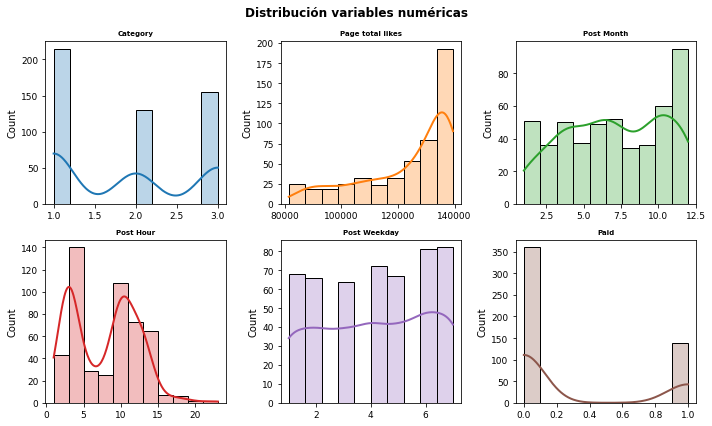

In [ ]:
# Gráfico de distribución para cada variable numérica
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))
axes = axes.flat

for i, colum in enumerate(numeric_features):
    sns.histplot(
        data    = df,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 9)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 12, fontweight = "bold");

**Análisis para variable cualitativa**

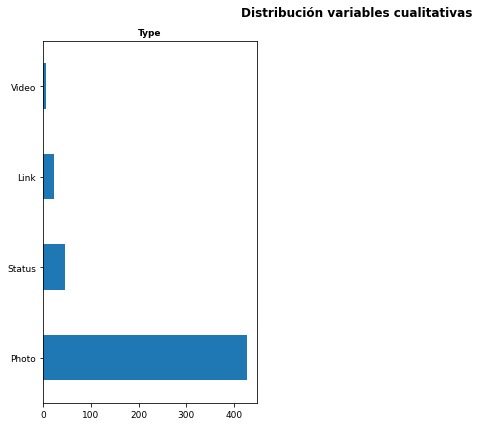

In [ ]:
# Gráfico para cada variable cualitativa

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 6))
axes = axes.flat


for i, colum in enumerate(qualitative_features):
    df[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 9, fontweight = "bold")
    axes[i].tick_params(labelsize = 9)
    axes[i].set_xlabel("")

# Se eliminan los axes vacíos
for i in [1, 2]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución variables cualitativas',
             fontsize = 12, fontweight = "bold");

**Transformaciones y definición de pipeline**

In [ ]:
# Transformaciones a factores numéricos de entrada:
cuant_pipeline = Pipeline(steps = [('impute_mediana', SimpleImputer(strategy='median')),
                                 ('escala_cuant', MinMaxScaler(feature_range=(1,2))),
                                 ('Square Root step', FunctionTransformer(np.sqrt))])   
cuant_pipeline_nombres = numeric_features

# Transformaciones a factor cualitativo de entrada:
categoricas_Imp_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent'))])  
catImp_pipeline_nombres = qualitative_features

# Conjuntamos las transformaciones numéricas y cualitativas que se estarán aplicando a los datos de entrada:
columnasTransformer = ColumnTransformer(transformers = [('cuantpipe', cuant_pipeline, cuant_pipeline_nombres),
                                                        ('catimp', categoricas_Imp_pipeline, catImp_pipeline_nombres)],
                                        remainder='passthrough')


#**Ejercicio-5.**

In [ ]:
#Partición del conjunto de entrenamiento y validación inicial: 100 para validación y 300 para entrenamiento
X_train, X_val, y_train, y_val = train_test_split(Xtv, ytv, test_size=0.25, shuffle=True, random_state=1)  

print(X_train.shape, ': dimensión de datos de entrada para entrenamiento y validación')
print(X_val.shape, ': dimensión de datos de entrada para prueba')  

print(y_train.shape, ': dimensión de variable de salida para entrenamiento y validación')
print(y_val.shape, ': dimensión de variable de salida para prueba')

(300, 7) : dimensión de datos de entrada para entrenamiento y validación
(100, 7) : dimensión de datos de entrada para prueba
(300, 1) : dimensión de variable de salida para entrenamiento y validación
(100, 1) : dimensión de variable de salida para prueba


In [ ]:
#modeloDummy = DummyRegressor(strategy='median')
modeloDummy = DummyRegressor(strategy='mean')
XT = columnasTransformer.fit_transform(X_train)
modeloDummy.fit(XT, y_train)
y_dumb = modeloDummy.predict(X_val)

#COMENTARIOS: Me da error usando mis funciones, creo que es un error con el manejo del numpy pero no he podido encontrar cómo resolverlo :(
    
print('Mean Absolute Error (MAE): ', mean_squared_error(y_val, y_dumb))
print('Root Mean Square Error (RMSE): ', np.sqrt(mean_squared_error(y_val, y_dumb)))

#print('Mean Absolute Error (MAE): ', mi_MAE(y_val, y_dumb))
#print('Root Mean Square Error (RMSE): ', mi_RMSE(y_val, y_dumb)))
#print('Mean Absolute Percentage Error (MAPE):',mi_MAPE(y_val, y_dumb))

Mean Absolute Error (MAE):  358932.69809999986
Root Mean Square Error (RMSE):  599.1099215502944


#**Ejercicio-6.**

In [ ]:
None

#**Ejercicio-7.**

In [ ]:
None

#**Ejercicio-8.**

In [ ]:
None

#**Ejercicio-9.**

In [ ]:
None

#**Ejercicio-10.**

In [ ]:
None

#**Ejercicio-11.**

In [ ]:
None

#**Ejercicio-12.**

In [ ]:
None

###**Fin de la Actividad de la semana 7.**